In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
class hodl_index():

    def __init__(self, df):
        
        self.df = df
        
    def take_profit_period(profit_expected):
        investment_usd = 100
        profit_expected += 1
        first_profit_period = np.zeros(len(self.df))
        for i in range(len(self.df)):
            investment_price = self.df.price.iloc[i]
            investment_cc = investment_usd / investment_price
            target_usd = investment_usd * profit_expected
            for k in range(i, len(self.df)):
                if investment_cc * self.df.price.iloc[k] >= target_usd:
                    first_profit_period[i] = (self.df.date.iloc[k] - self.df.date.iloc[i]).days / 365            
                    break
        self.df['first_profit_period'] = first_profit_period
        fig = plt.figure()
        ax = fig.add_subplot(111)
        self.df.first_profit_period.T.plot(kind='bar', figsize=(30, 10))
        plt.ylabel('Years')
        plt.xlabel('Years')
        ax.set_xticks(range(0, len(self.df), 365))
        ax.set_xticklabels([str(i) for i in range(self.df.date.min().year, self.df.date.max().year + 1)])
        plt.show()

    def fit(self, verbose = False):
        hlp = np.zeros(len(self.df))
        for i in range(len(self.df)):
            investment_price = self.df.price.iloc[i]
            last_lost_date = self.df.date.iloc[i]
            for k in range(i, len(self.df)):
                if investment_price > self.df.price.iloc[k]:
                    last_lost_date = self.df.date.iloc[k]
            hlp[i] = (last_lost_date - self.df.date.iloc[i]).days / 365
        df['hodl_lost_period'] = hlp

    def plot(self, title = 'Hodl index', scale = True):
        temp_df = pd.DataFrame(self.df)
        if scale:
            temp_df['price_h'] = temp_df.price * max(temp_df.hodl_lost_period)/max(temp_df.price)
        x = temp_df['date'].values.tolist()

        y1 = temp_df['price_h'].values.tolist()
        y2 = temp_df['hodl_lost_period'].values.tolist()

        mycolors = ['tab:red', 'tab:blue', 'tab:red', 'tab:green', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
        columns = ['price_h', 'hodl_lost_period', 'price_s', 'short_lost_period']
        # Draw Plot 
        fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
        ax.fill_between(x, y1=y1, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=1)
        ax.fill_between(x, y1=y2, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=1)

        ax.set_title(title, fontsize=18)
        plt.show()

### Prepare data

In [ ]:
# https://www.investing.com/crypto/bitcoin/btc-usd-historical-data

In [5]:
def repair_date(val):    
    return datetime.strptime(val, '%b %d, %Y')

def repair_price(val):
    return float(val.replace(',',''))

In [14]:
df = pd.read_csv('Bitcoin Historical Data - Investing.com.csv')
perv_columns = df.columns
df['date'] = df.Date.apply(repair_date)
df['price'] = df.Price.apply(repair_price)
df.drop([c for c in perv_columns], axis = 1, inplace = True)
df.sort_values(by=['date'], ascending=True, inplace = True)
df = pd.DataFrame(df[df.date >= datetime.strptime(str(df.date.min().year + 1), '%Y')])
df = pd.DataFrame(df[df.date < datetime.strptime(str(df.date.max().year), '%Y')])
print('from:', df.date.min())
print('to:', df.date.max())
print('\n', df.head(1))

from: 2011-01-01 00:00:00
to: 2020-12-31 00:00:00

            date  price
3728 2011-01-01    0.3


In [18]:
hodl = hodl_index(df)

In [19]:
hodl.fit()

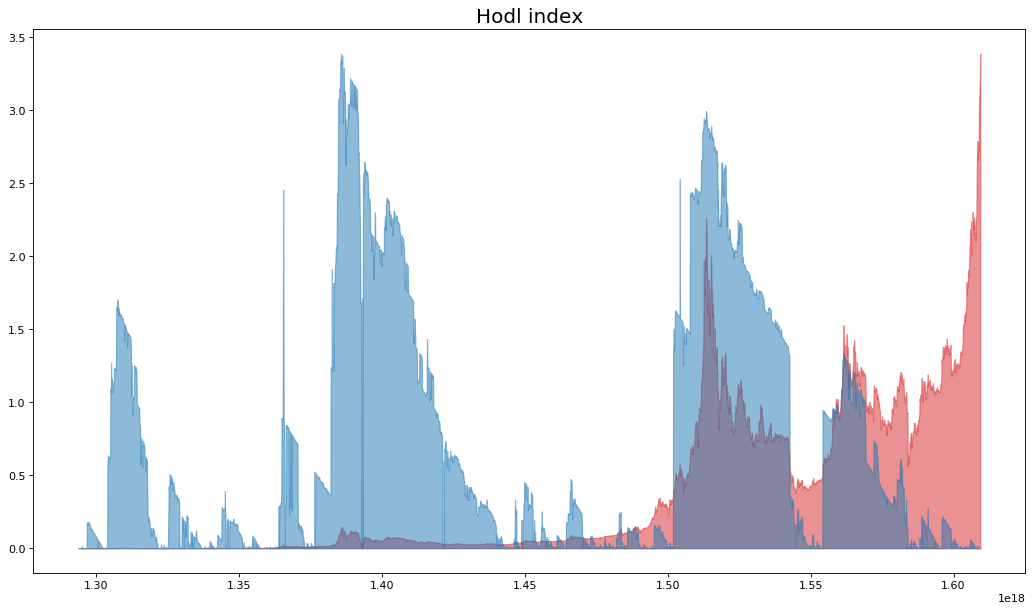

In [20]:
hodl.plot()